problem a done!
problem b done!
problem b1 done!
problem b2 done!
problem c done!
problem c1 done!
problem a done!
problem b done!
problem b1 done!
problem b2 done!
problem c done!
problem c1 done!
problem a done!
problem b done!
problem b1 done!
problem b2 done!
problem c done!
problem c1 done!
problem a done!
problem b done!
problem b1 done!
problem b2 done!
problem c done!
problem c1 done!
problem a done!
problem b done!
problem b1 done!
problem b2 done!
problem c done!
problem c1 done!
problem a done!
problem b done!
problem b1 done!
problem b2 done!
problem c done!
problem c1 done!
problem a done!
problem b done!
problem b1 done!
problem b2 done!
problem c done!
problem c1 done!
problem a done!
problem b done!
problem b1 done!
problem b2 done!
problem c done!
problem c1 done!
problem a done!
problem b done!
problem b1 done!
problem b2 done!
problem c done!
problem c1 done!
problem a done!
problem b done!
problem b1 done!
problem b2 done!
problem c done!
problem c1 done!


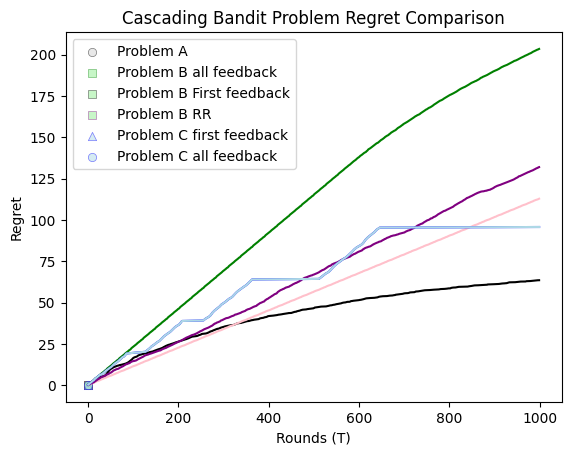

In [2]:
from matplotlib import pyplot as plt
import random
import numpy as np

import importlib
import problem_a
import problem_b
import problem_b1
import problem_b2
import problem_c
import problem_c1

importlib.reload(problem_a)
importlib.reload(problem_b)
importlib.reload(problem_c)
importlib.reload(problem_b1)
importlib.reload(problem_b2)
importlib.reload(problem_c1) 

T = 10000
num_runs = 10
indiv_arms = 3
num_positions = 2
num_players = 3
num_arms = indiv_arms ** num_players

regret_a = np.zeros(T)
regret_b = np.zeros(T)
regret_b1 = np.zeros(T)
regret_b2 = np.zeros(T)
regret_c = np.zeros(T)
regret_c1 = np.zeros(T)

for index in range(0, num_runs):
    click_probabilities = [random.uniform(0,1) for a in range(num_arms)]
    a = problem_a.simulate_cascading_bandit(T, indiv_arms, num_arms, num_positions, num_players, click_probabilities)
    print("problem a done!")
    b = problem_b.simulate_cascading_bandit(T, num_arms, num_positions, num_players, click_probabilities)
    print("problem b done!")
    b1 = problem_b1.simulate_cascading_bandit(T, num_arms, num_players, num_players, click_probabilities)
    print("problem b1 done!")
    b2 = problem_b2.simulate_cascading_bandit(T, num_arms, num_players, num_players, click_probabilities)
    print("problem b2 done!")
    c = problem_c.simulate_cascading_bandit(T, indiv_arms, num_arms, num_positions, num_players, click_probabilities)
    print("problem c done!")
    c1 = problem_c1.simulate_cascading_bandit(T, indiv_arms, num_arms, num_positions, num_players, click_probabilities)
    print("problem c1 done!")
    
    for t in range(T):
        regret_a[t] += a[t]
        regret_b[t] += b[t]
        regret_b1[t] += b1[t]
        regret_b2[t] += b2[t]
        regret_c[t] += c[t]
        regret_c1[t] += c1[t]

for t in range(T):
    regret_a[t] /= num_runs
    regret_b[t] /= num_runs
    regret_b1[t] /= num_runs
    regret_b2[t] /= num_runs
    regret_c[t] /= num_runs
    regret_c1[t] /= num_runs

indices = range(0, T, 3000)

plt.scatter(indices, [regret_a[i] for i in indices], label="Problem A", alpha=0.5, marker="o", color="lightgray", edgecolors="black", linewidth=0.5)
plt.scatter(indices, [regret_b[i] for i in indices], label="Problem B all feedback", alpha=0.5, marker="s", color="lightgreen", edgecolors="green", linewidth=0.5)
plt.scatter(indices, [regret_b1[i] for i in indices], label="Problem B First feedback", alpha=0.5, marker="s", color="lightgreen", edgecolors="black", linewidth=0.5)
plt.scatter(indices, [regret_b1[i] for i in indices], label="Problem B RR", alpha=0.5, marker="s", color="lightgreen", edgecolors="purple", linewidth=0.5)
plt.scatter(indices, [regret_c[i] for i in indices], label="Problem C first feedback", alpha=0.5, marker="^", color="lightblue", edgecolors="blue", linewidth=0.5)
plt.scatter(indices, [regret_c[i] for i in indices], label="Problem C all feedback", alpha=0.5, marker="o", color="lightblue", edgecolors="blue", linewidth=0.5)

plt.plot(list(range(T)), regret_a, color="black")
plt.plot(list(range(T)), regret_b, color="green")
plt.plot(list(range(T)), regret_b1, color="pink")
plt.plot(list(range(T)), regret_b2, color="purple")
plt.plot(list(range(T)), regret_c, color="blue")
plt.plot(list(range(T)), regret_c, color="lightblue")

plt.xlabel("Rounds (T)")
plt.ylabel("Regret")
plt.title("Cascading Bandit Problem Regret Comparison")
plt.legend()
plt.show()